# 实验二 线性系统根轨迹研究


已知单位负反馈系统的开环传递函数为

$$
G(s)=\frac{K(x+2)}{(s^2 + 4s +5)^2}
$$

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
#tf,rlocus
import numpy as np;
num=np.array([1,2])
den=np.convolve([1,4,5],[1,4,5])
G=tf(num,den)

## 1、绘制闭环系统根轨迹

向[control.matlab.rlocus](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.rlocus.html)传入开环传递函数G，函数将计算闭环系统特征方程1+kG=0的跟轨迹，并绘制根轨迹图

poles of G: [-2.+1.00000005j -2.-1.00000005j -2.+0.99999995j -2.-0.99999995j]
zeros of G: [-2.]
branchs: 4


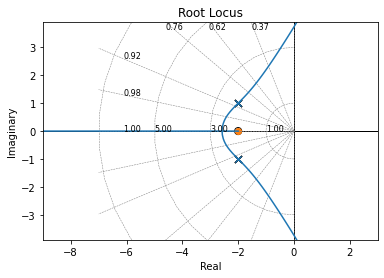

In [2]:
p,z=pzmap(G)
print("poles of G:",p)
print("zeros of G:",z)
print("branchs:",max([p.shape[0],z.shape[0]]))
rlocus(G)
plt.show()

## 2、闭环系统临界稳定增益

闭环系统根轨迹与虚轴的交点对应的增益值，为临界稳定增益，绘制闭环系统阶跃响应图可以观察到**等幅震荡**

In [3]:
#与虚轴的交点，临界稳定点
klist=np.linspace(1,100,100000)
rlist,klist=rlocus(G,kvect=klist,plot=False)
CriticalStableGain=[]
for i in range(rlist.shape[1]):
    branch=rlist[:,i]
    absmin=abs(branch.real).min()
    if(absmin<0.01):
        idx=np.argmin(abs(branch.real))
        k=klist[idx]
        CriticalStableGain.append(k)
        print('position:{:.2f},  gain:{:}'.format(branch[idx],k))


position:-0.00-3.73j,  gain:71.5540455404554
position:-0.00+3.73j,  gain:71.5540455404554


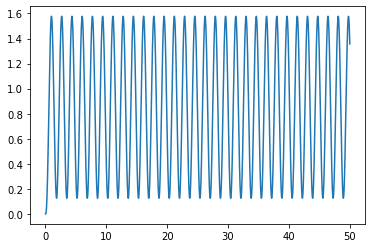

In [4]:
k = CriticalStableGain[0]
Phi=feedback(k*G,1)
y,t=step(Phi,50)
plt.plot(t,y)
plt.show()